In [25]:
import sys
import os
import logging

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

msg_format = "%(asctime)s|%(levelname)s|%(filename)s:%(lineno)d| %(message)s"
date_format = "%d-%b-%y %H:%M:%S"
logging.basicConfig(level=logging.INFO, format=msg_format, datefmt=date_format, stream=sys.stdout)

pwd = os.getcwd()
module_path = f"{pwd}\..\src"
sys.path.insert(0, module_path)

from datetime import datetime, timedelta
from hostelprices.scrape_web import ScrapeWeb
from hostelprices.utils import Utils, Defs 
from hostelprices.database import Database
from hostelprices.analysis import HostelDF

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
client_id = Utils.fromConfig('mongo_client')
data_base_name = Utils.fromConfig('data_base_name')
#collection_name = "main_coll--main-12_30_2022-08_22"
collection_name = "main_coll-longterm00-dev-01_03_2023-12_21"

DB = Database(
    client_id=client_id, data_base_name=data_base_name, collection_name=collection_name
    )
DB.filterCollections(contains='-longterm00-')#'-main-'

AttributeError: 'Database' object has no attribute 'coll_names'

In [31]:
df_all = DB.getPandasDf()
df_all

,_id,price (EUR),rating,distance (km),city,date from,duration (days),request time,collection,collection time
0,63b42ffe1076e2148a57897c,29.954133,9.7,0.4,Lisbon,2023-01-04 12:21:49.129,1,2023-01-03 12:22:48.362,main_coll-longterm00-dev-01_03_2023-12_21,2023-01-03 12:21:00
1,63b42ffe1076e2148a57897d,23.401666,9.7,0.5,Lisbon,2023-01-04 12:21:49.129,1,2023-01-03 12:22:48.362,main_coll-longterm00-dev-01_03_2023-12_21,2023-01-03 12:21:00
2,63b42ffe1076e2148a57897e,7.220000,9.3,1.3,Lisbon,2023-01-04 12:21:49.129,1,2023-01-03 12:22:48.362,main_coll-longterm00-dev-01_03_2023-12_21,2023-01-03 12:21:00
3,63b42ffe1076e2148a57897f,4.180000,9.2,0.5,Lisbon,2023-01-04 12:21:49.129,1,2023-01-03 12:22:48.362,main_coll-longterm00-dev-01_03_2023-12_21,2023-01-03 12:21:00
4,63b42ffe1076e2148a578980,28.081999,9.7,0.3,Lisbon,2023-01-04 12:21:49.129,1,2023-01-03 12:22:48.362,main_coll-longterm00-dev-01_03_2023-12_21,2023-01-03 12:21:00
...,...,...,...,...,...,...,...,...,...,...
2138,63b42ffe1076e2148a5791d6,14.041000,7.8,1.0,Seville,2023-01-22 12:21:49.129,5,2023-01-03 13:38:59.398,main_coll-longterm00-dev-01_03_2023-12_21,2023-01-03 12:21:00
2139,63b42ffe1076e2148a5791d7,15.913133,8.8,1.1,Seville,2023-01-22 12:21:49.129,5,2023-01-03 13:38:59.398,main_coll-longterm00-dev-01_03_2023-12_21,2023-01-03 12:21:00
2140,63b42ffe1076e2148a5791d8,24.337733,9.0,1.1,Seville,2023-01-22 12:21:49.129,5,2023-01-03 13:38:59.398,main_coll-longterm00-dev-01_03_2023-12_21,2023-01-03 12:21:00
2141,63b42ffe1076e2148a5791d9,16.849200,7.7,1.2,Seville,2023-01-22 12:21:49.129,5,2023-01-03 13:38:59.398,main_coll-longterm00-dev-01_03_2023-12_21,2023-01-03 12:21:00


In [32]:
hdf = HostelDF(df_all)
hdf

,_id,price (EUR),rating,distance (km),city,date from,duration (days),request time,collection,collection time,days before,rating per price
0,63b42ffe1076e2148a57897c,29.954133,9.7,0.4,Lisbon,2023-01-04 12:21:49.129,1,2023-01-03 12:22:48.362,main_coll-longterm00-dev-01_03_2023-12_21,2023-01-03 12:21:00,1.000569,0.323828
1,63b42ffe1076e2148a57897d,23.401666,9.7,0.5,Lisbon,2023-01-04 12:21:49.129,1,2023-01-03 12:22:48.362,main_coll-longterm00-dev-01_03_2023-12_21,2023-01-03 12:21:00,1.000569,0.414500
2,63b42ffe1076e2148a57897e,7.220000,9.3,1.3,Lisbon,2023-01-04 12:21:49.129,1,2023-01-03 12:22:48.362,main_coll-longterm00-dev-01_03_2023-12_21,2023-01-03 12:21:00,1.000569,1.288089
3,63b42ffe1076e2148a57897f,4.180000,9.2,0.5,Lisbon,2023-01-04 12:21:49.129,1,2023-01-03 12:22:48.362,main_coll-longterm00-dev-01_03_2023-12_21,2023-01-03 12:21:00,1.000569,2.200957
4,63b42ffe1076e2148a578980,28.081999,9.7,0.3,Lisbon,2023-01-04 12:21:49.129,1,2023-01-03 12:22:48.362,main_coll-longterm00-dev-01_03_2023-12_21,2023-01-03 12:21:00,1.000569,0.345417
...,...,...,...,...,...,...,...,...,...,...,...,...
2138,63b42ffe1076e2148a5791d6,14.041000,7.8,1.0,Seville,2023-01-22 12:21:49.129,5,2023-01-03 13:38:59.398,main_coll-longterm00-dev-01_03_2023-12_21,2023-01-03 12:21:00,19.000569,0.555516
2139,63b42ffe1076e2148a5791d7,15.913133,8.8,1.1,Seville,2023-01-22 12:21:49.129,5,2023-01-03 13:38:59.398,main_coll-longterm00-dev-01_03_2023-12_21,2023-01-03 12:21:00,19.000569,0.553002
2140,63b42ffe1076e2148a5791d8,24.337733,9.0,1.1,Seville,2023-01-22 12:21:49.129,5,2023-01-03 13:38:59.398,main_coll-longterm00-dev-01_03_2023-12_21,2023-01-03 12:21:00,19.000569,0.369796
2141,63b42ffe1076e2148a5791d9,16.849200,7.7,1.2,Seville,2023-01-22 12:21:49.129,5,2023-01-03 13:38:59.398,main_coll-longterm00-dev-01_03_2023-12_21,2023-01-03 12:21:00,19.000569,0.456995


In [33]:
print(hdf.city.value_counts())
print(hdf["collection time"].value_counts())
print(hdf[Defs.colName('date_from')].value_counts())
print(hdf[Defs.colName('time_before')].value_counts())
print(hdf[Defs.colName('duration')].value_counts())

Lisbon     1398
Seville     745
Name: city, dtype: int64
2023-01-03 12:21:00    2143
Name: collection time, dtype: int64
2023-01-22 12:21:49.129    118
2023-01-07 12:21:49.129    117
2023-01-16 12:21:49.129    116
2023-01-17 12:21:49.129    115
2023-01-10 12:21:49.129    114
2023-01-05 12:21:49.129    114
2023-01-04 12:21:49.129    114
2023-01-06 12:21:49.129    114
2023-01-12 12:21:49.129    113
2023-01-15 12:21:49.129    112
2023-01-08 12:21:49.129    112
2023-01-18 12:21:49.129    112
2023-01-19 12:21:49.129    112
2023-01-20 12:21:49.129    112
2023-01-21 12:21:49.129    112
2023-01-14 12:21:49.129    110
2023-01-11 12:21:49.129    109
2023-01-13 12:21:49.129    109
2023-01-09 12:21:49.129    108
Name: date from, dtype: int64
19.000569    118
4.000569     117
13.000569    116
14.000569    115
7.000569     114
2.000569     114
1.000569     114
3.000569     114
9.000569     113
12.000569    112
5.000569     112
15.000569    112
16.000569    112
17.000569    112
18.000569    112
11.00

In [36]:
hdf_sel = hdf.filter(
    (hdf[Defs.colName('city')]=='Lisbon') & \
    #& (hdf[Defs.colName('date_from')]=='2023-01-13') & \
    (hdf[Defs.colName('distance')]<10) & (hdf[Defs.colName('rating')]>5) 
    #& (hdf[Defs.colName('duration')]==5)
    )
len(hdf_sel)

1368

In [37]:
hdf_sel["collection time"].value_counts().index

DatetimeIndex(['2023-01-03 12:21:00'], dtype='datetime64[ns]', freq=None)

In [38]:
print(hdf_sel.city.value_counts())
print(hdf_sel["collection time"].value_counts())
print(hdf_sel[Defs.colName('date_from')].value_counts())
print(hdf_sel[Defs.colName('time_before')].value_counts())
print(hdf_sel[Defs.colName('duration')].value_counts())

Lisbon    1368
Name: city, dtype: int64
2023-01-03 12:21:00    1368
Name: collection time, dtype: int64
2023-01-22 12:21:49.129    75
2023-01-07 12:21:49.129    75
2023-01-17 12:21:49.129    73
2023-01-10 12:21:49.129    73
2023-01-16 12:21:49.129    73
2023-01-05 12:21:49.129    72
2023-01-21 12:21:49.129    72
2023-01-20 12:21:49.129    72
2023-01-15 12:21:49.129    72
2023-01-04 12:21:49.129    72
2023-01-12 12:21:49.129    72
2023-01-08 12:21:49.129    72
2023-01-14 12:21:49.129    71
2023-01-09 12:21:49.129    71
2023-01-18 12:21:49.129    71
2023-01-19 12:21:49.129    71
2023-01-06 12:21:49.129    71
2023-01-13 12:21:49.129    71
2023-01-11 12:21:49.129    69
Name: date from, dtype: int64
19.000569    75
4.000569     75
14.000569    73
7.000569     73
13.000569    73
2.000569     72
18.000569    72
17.000569    72
12.000569    72
1.000569     72
9.000569     72
5.000569     72
11.000569    71
6.000569     71
15.000569    71
16.000569    71
3.000569     71
10.000569    71
8.000569

c:\Users\fsgl1\Documents\programming\hostelprices\notebooks\..\src\hostelprices\analysis.py:201: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\fsgl1\Documents\programming\hostelprices\notebooks\..\src\hostelprices\analysis.py:201: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


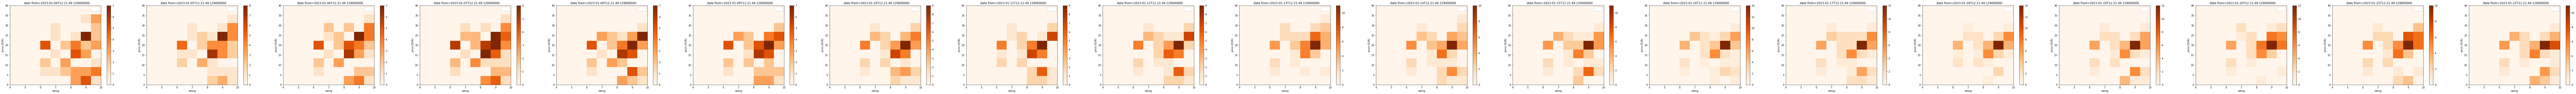

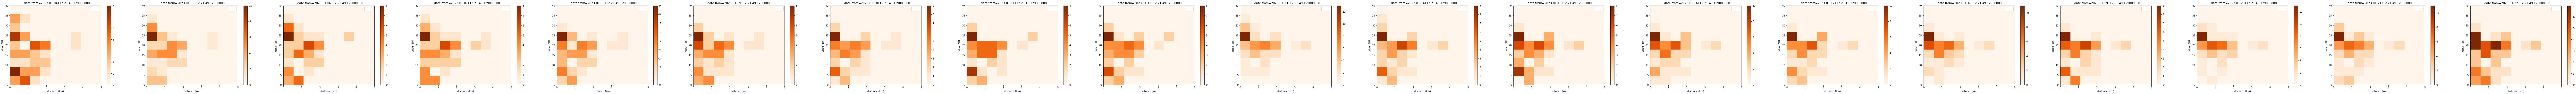

In [39]:
_ = hdf_sel.plot(
    x=Defs.colName('rating'), y=Defs.colName('price'), 
    col=Defs.colName('date_from'),
    hist=True, 
    xlim=(4,10), ylim=(0,40), nbins=10
    )
_ = hdf_sel.plot(
    x=Defs.colName('distance'), y=Defs.colName('price'), 
    col=Defs.colName('date_from'),
    hist=True, 
    xlim=(0,5), ylim=(0,40), nbins=10
    )

c:\Users\fsgl1\Documents\programming\hostelprices\notebooks\..\src\hostelprices\analysis.py:201: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\fsgl1\Documents\programming\hostelprices\notebooks\..\src\hostelprices\analysis.py:201: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


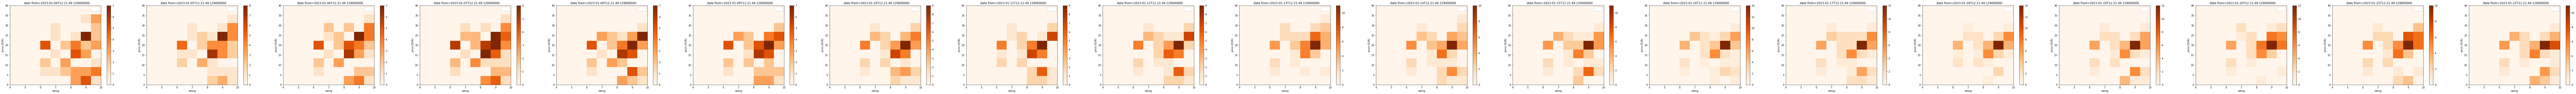

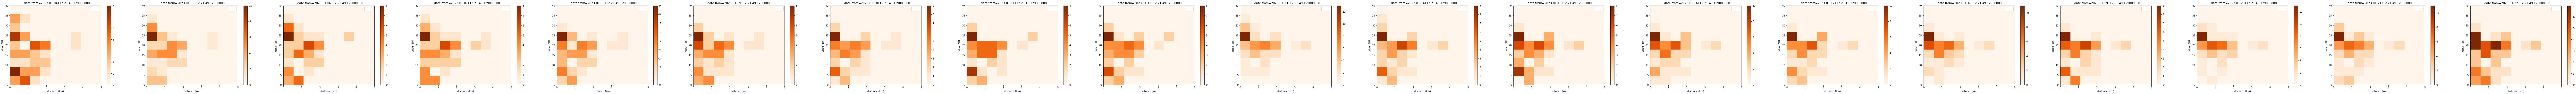

In [40]:
_ = hdf_sel.plot(
    x=Defs.colName('rating'), y=Defs.colName('price'), 
    col=Defs.colName('date_from'),
    hist=True, 
    xlim=(4,10), ylim=(0,40), nbins=10
    )
_ = hdf_sel.plot(
    x=Defs.colName('distance'), y=Defs.colName('price'), 
    col=Defs.colName('date_from'),
    hist=True, 
    xlim=(0,5), ylim=(0,40), nbins=10
    )

In [41]:
def processed_values_plot(axs, hdf, city='Lisbon', date_from='2023-01-13', max_dist=5, min_rating=5, duration=5, label=None):
    hdf_new = hdf.filter(
        (hdf[Defs.colName('city')]==city) & (hdf[Defs.colName('date_from')]==date_from) & \
        (hdf[Defs.colName('distance')]<max_dist) & (hdf[Defs.colName('rating')]>min_rating) & \
        (hdf[Defs.colName('duration')]==duration)
        )
    time_before, avg_price, n_hostels = hdf_new.cummulated()
    axs[0].plot(time_before, avg_price, label=label)
    axs[0].set_xlabel('days before')
    axs[0].set_ylabel('lowest price')
    axs[1].plot(time_before, n_hostels, label=label)
    axs[1].set_xlabel('days before')
    axs[1].set_ylabel('number of hostels')

IndexError: index 0 is out of bounds for axis 0 with size 0

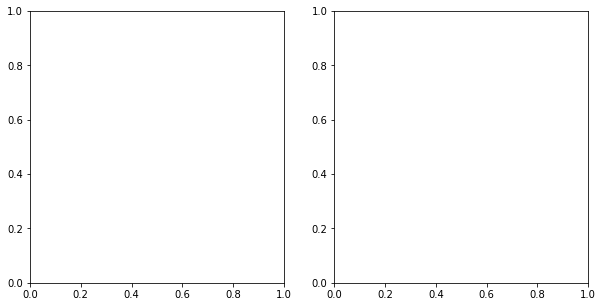

In [42]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(10,5)
processed_values_plot(axs, hdf_sel, duration=5, label='min_rating=5')
processed_values_plot(axs, hdf_sel, duration=5, min_rating=9, label='min_rating=9')
plt.legend()
fig.show()

C:\Users\fsgl1\AppData\Local\Temp\ipykernel_23984\1579915061.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


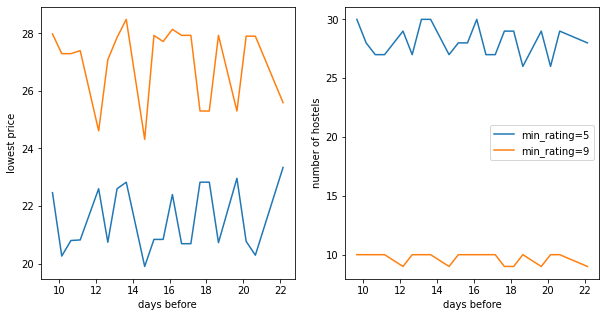

In [ ]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(10,5)
processed_values_plot(axs, hdf_sel, duration=1, label='min_rating=5')
processed_values_plot(axs, hdf_sel, duration=1, min_rating=9, label='min_rating=9')
plt.legend()
fig.show()